# 업종별 제주도 이용자 수 예측

### 라이브러리

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기

In [3]:
rec_files=glob('../Data/rec/*.csv')
rec_files

[]

In [4]:
# tmp_raw=[]

# for file_name in rec_files:
#     tmp=pd.read_csv(file_name,encoding='euc-kr')
#     tmp_raw.append(tmp)

# rec_raw=pd.concat(tmp_raw)
# rec_raw.head(50)

ValueError: No objects to concatenate

## 업종 선택

In [ ]:
df=rec_raw[rec_raw['업종명'].isin(['기타 수상오락 서비스업', '관광 민예품 및 선물용품 소매업', '그외 기타 분류안된 오락 관련 서비스업', '비알콜 음료점업', '스포츠 및 레크레이션 용품 임대업', '빵 및 과자류 소매업', '서양식 음식점업', '기타 외국식 음식점업', '일식 음식점업', '피자 햄버거 샌드위치 유사 음식점업', '한식 음식점업', '중식 음식점업'])]
df.shape

(15586, 8)

## 데이터 정제

### 불필요한 컬럼 삭제

In [ ]:
df.drop(columns='데이터기준일자',inplace=True)
df.shape

C:\Users\dbtmd\AppData\Local\Temp\ipykernel_10576\2127767349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='데이터기준일자',inplace=True)


(15586, 7)

### 연도와 월 쪼개기

In [ ]:
df['연도']=[year.split('-')[0] for year in df['년월']]
df['월']=[year.split('-')[1] for year in df['년월']]

C:\Users\dbtmd\AppData\Local\Temp\ipykernel_10576\4137038332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연도']=[year.split('-')[0] for year in df['년월']]
C:\Users\dbtmd\AppData\Local\Temp\ipykernel_10576\4137038332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['월']=[year.split('-')[1] for year in df['년월']]


## 데이터 저장

In [ ]:
df.to_csv('../Data/jeju_rec.csv',index=None)

## 초기 머신 러닝 예측

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df_onehot=df.copy()
for column in ['연도','월','읍면동명','업종명']:
    df_total2=pd.get_dummies(df[column],prefix=column)
    df_onehot=pd.concat([df_onehot,df_total2],axis=1)
df_onehot.drop(columns=['년월','시도명','읍면동명','업종명','연도','월'],inplace=True)

rf=RandomForestRegressor()
train_input,test_input,train_target,test_target=train_test_split(df_onehot.iloc[:,2:],df_onehot[['이용자수']])
sub_input,val_input,sub_target,val_target=train_test_split(train_input,train_target,test_size=0.2)
rf.fit(sub_input,sub_target)

print(f"Train score: {rf.score(sub_input,sub_target)}")
print(f"Valid score: {rf.score(val_input,val_target)}")
print(f"Test score: {rf.score(test_input,test_target)}")

Train score: 0.9981941662485321
Valid score: 0.986417714264733
Test score: 0.9818506256435967


## 인구 데이터 추가

### 데이터 불러오기

In [ ]:
#2020년까지
jeju_pop=pd.read_csv('../Data/jeju_pop.csv')
jeju_pop.head()

,읍면동명,권역,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,건입동,제주시 동권역,10904,10887,10573,10436,10310,10209,10085,9857,9571,9325
1,구좌읍,제주시 동부권역,14810,14688,14569,14984,15175,15533,16045,16283,16232,16129
2,남원읍,서귀포시 동부권역,18304,18285,18323,18529,19095,19680,19791,19778,19707,19469
3,노형동,제주시 동권역,51184,51738,52133,53867,54715,55039,55021,56223,56611,57190
4,대륜동,서귀포시 동권역,9310,9344,9305,10449,11316,13422,13568,14156,14657,14963


In [ ]:
jeju_pop['읍면동명'].unique()

array(['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동',
       '봉개동', '삼도이동', '삼도일동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면',
       '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담이동', '용담일동', '우도면',
       '이도이동', '이도일동', '이호동', '일도이동', '일도일동', '정방동', '조천읍', '중문동', '중앙동',
       '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동'], dtype=object)

In [ ]:
#2021년
jeju_pop_21=pd.read_csv('../Data/jeju_pop_2021.csv',encoding='euc-kr',header=1)
jeju_pop_21.head()

,행정시별(1),행정시별(2),제주 인구(계) (명),제주 인구(남) (명),제주 인구(여) (명),한국인 세대수 (세대),한국인(계) (명),한국인(남) (명),한국인(여) (명),외국인(계) (명),외국인(남) (명),외국인(여) (명)
0,제주특별자치도,소계,697476,350822,346654,307529,676759,339177,337582,20717,11645,9072
1,제주시,소계,506843,253974,252869,219978,493096,246494,246602,13747,7480,6267
2,제주시,한 림 읍,24291,12917,11374,10641,21248,10908,10340,3043,2009,1034
3,제주시,애 월 읍,38483,19684,18799,17276,37532,19209,18323,951,475,476
4,제주시,구 좌 읍,15948,8279,7669,7945,15397,7898,7499,551,381,170


### 데이터 정제

In [ ]:
jeju_pop_21=jeju_pop_21[['행정시별(2)','제주 인구(계) (명)']]
jeju_pop_21.head()

,행정시별(2),제주 인구(계) (명)
0,소계,697476
1,소계,506843
2,한 림 읍,24291
3,애 월 읍,38483
4,구 좌 읍,15948


In [ ]:
jeju_pop_21.columns=['읍면동명','2021']
jeju_pop_21.head()

,읍면동명,2021
0,소계,697476
1,소계,506843
2,한 림 읍,24291
3,애 월 읍,38483
4,구 좌 읍,15948


In [ ]:
jeju_pop_21=jeju_pop_21[jeju_pop_21['읍면동명']!='소계']
jeju_pop_21.head()

,읍면동명,2021
2,한 림 읍,24291
3,애 월 읍,38483
4,구 좌 읍,15948
5,조 천 읍,26032
6,한 경 면,9649


In [ ]:
jeju_pop_21['읍면동명']=[city.replace(' ','') for city in jeju_pop_21['읍면동명']]
jeju_pop_21.head()

,읍면동명,2021
2,한림읍,24291
3,애월읍,38483
4,구좌읍,15948
5,조천읍,26032
6,한경면,9649


#### 동 이름 통일

In [ ]:
jeju_pop_21['읍면동명']=[city.replace('1','일').replace('2','이').replace('3','삼') for city in jeju_pop_21['읍면동명']]
jeju_pop_21['읍면동명'].unique()

array(['한림읍', '애월읍', '구좌읍', '조천읍', '한경면', '추자면', '우도면', '일도일동', '일도이동',
       '이도일동', '이도이동', '삼도일동', '삼도이동', '용담일동', '용담이동', '건입동', '화북동',
       '삼양동', '봉개동', '아라동', '오라동', '연동', '노형동', '외도동', '이호동', '도두동',
       '대정읍', '남원읍', '성산읍', '안덕면', '표선면', '송산동', '정방동', '중앙동', '천지동',
       '효돈동', '영천동', '동홍동', '서홍동', '대륜동', '대천동', '중문동', '예래동'],
      dtype=object)

### 2020년까지의 데이터에 2021년 데이터 추가

In [ ]:
jeju_pop=pd.merge(jeju_pop,jeju_pop_21,how='inner',on='읍면동명')
jeju_pop=jeju_pop[['읍면동명','권역','2018','2019','2020','2021']]
jeju_pop.head()

,읍면동명,권역,2018,2019,2020,2021
0,건입동,제주시 동권역,9857,9571,9325,9079
1,구좌읍,제주시 동부권역,16283,16232,16129,15948
2,남원읍,서귀포시 동부권역,19778,19707,19469,19248
3,노형동,제주시 동권역,56223,56611,57190,57484
4,대륜동,서귀포시 동권역,14156,14657,14963,15513


### 이용자 수 데이터에 추가하기 쉬운 형태로 변형

In [ ]:
jeju_pop.set_index('읍면동명',inplace=True,drop=False)
jeju_pop=jeju_pop[['읍면동명','권역','2018','2019','2020','2021']]
jeju_pop.head()

,읍면동명,권역,2018,2019,2020,2021
읍면동명,,,,,,
건입동,건입동,제주시 동권역,9857,9571,9325,9079
구좌읍,구좌읍,제주시 동부권역,16283,16232,16129,15948
남원읍,남원읍,서귀포시 동부권역,19778,19707,19469,19248
노형동,노형동,제주시 동권역,56223,56611,57190,57484
대륜동,대륜동,서귀포시 동권역,14156,14657,14963,15513


In [ ]:
df_dict={}
df_dict['연도']=[]
df_dict['읍면동명']=[]
df_dict['권역']=[]
df_dict['인구']=[]

for i,k in zip(jeju_pop['읍면동명'],jeju_pop['권역']):
    for j in jeju_pop.columns[2:]:
        df_dict['연도'].append(j)
        df_dict['읍면동명'].append(i)
        df_dict['권역'].append(k)
        df_dict['인구'].append(jeju_pop.loc[i,j])
df_dict

{'연도': ['2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2021',
  '2018',
  '2019',
  '2020',
  '2

In [ ]:
df_pop=pd.DataFrame(df_dict)
df_pop.head()

,연도,읍면동명,권역,인구
0,2018,건입동,제주시 동권역,9857
1,2019,건입동,제주시 동권역,9571
2,2020,건입동,제주시 동권역,9325
3,2021,건입동,제주시 동권역,9079
4,2018,구좌읍,제주시 동부권역,16283


In [ ]:
df_pop['읍면동명'].unique()

array(['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동',
       '봉개동', '삼도이동', '삼도일동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면',
       '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담이동', '용담일동', '우도면',
       '이도이동', '이도일동', '이호동', '일도이동', '일도일동', '정방동', '조천읍', '중문동', '중앙동',
       '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동'], dtype=object)

### 동 이름 통일

In [ ]:
# df['읍면동명']=[city.replace('1','일').replace('2','이').replace('3','삼') for city in df['읍면동명']]

In [ ]:
# df['읍면동명'].unique()

NameError: name 'df' is not defined

In [ ]:
# df_pop['읍면동명'].unique()

array(['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동',
       '봉개동', '삼도이동', '삼도일동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면',
       '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담이동', '용담일동', '우도면',
       '이도이동', '이도일동', '이호동', '일도이동', '일도일동', '정방동', '조천읍', '중문동', '중앙동',
       '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동'], dtype=object)

In [ ]:
df = pd.read_csv("../JejuData/jeju_sales_rain.csv")
df

,년월,시도명,읍면동명,업종명,이용자수,이용금액,총 유동인구,연도,월,권역,분기,강수량
0,2018-01,서귀포시,남원읍,관광 민예품 및 선물용품 소매업,147,5320500,1.555958e+07,2018,1,서귀포시 동부권역,1/4분기,63.7
1,2018-01,서귀포시,남원읍,기타 외국식 음식점업,173,4998000,1.555958e+07,2018,1,서귀포시 동부권역,1/4분기,63.7
2,2018-01,서귀포시,남원읍,비알콜 음료점업,432,5110800,1.555958e+07,2018,1,서귀포시 동부권역,1/4분기,63.7
3,2018-01,서귀포시,남원읍,빵 및 과자류 소매업,1003,13434780,1.555958e+07,2018,1,서귀포시 동부권역,1/4분기,63.7
4,2018-01,서귀포시,남원읍,서양식 음식점업,2660,48084140,1.555958e+07,2018,1,서귀포시 동부권역,1/4분기,63.7
...,...,...,...,...,...,...,...,...,...,...,...,...
15581,2021-05,서귀포시,천지동,빵 및 과자류 소매업,7298,129770690,1.022769e+07,2021,5,서귀포시 동권역,2/4분기,159.2
15582,2021-05,서귀포시,천지동,비알콜 음료점업,7527,83256320,1.022769e+07,2021,5,서귀포시 동권역,2/4분기,159.2
15583,2021-05,서귀포시,천지동,기타 외국식 음식점업,965,33476100,1.022769e+07,2021,5,서귀포시 동권역,2/4분기,159.2
15584,2021-05,서귀포시,천지동,관광 민예품 및 선물용품 소매업,1903,44802148,1.022769e+07,2021,5,서귀포시 동권역,2/4분기,159.2


In [ ]:
# df['연도'] = df['연도'].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15586 entries, 0 to 15585
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년월      15586 non-null  object 
 1   시도명     15586 non-null  object 
 2   읍면동명    15586 non-null  object 
 3   업종명     15586 non-null  object 
 4   이용자수    15586 non-null  int64  
 5   이용금액    15586 non-null  int64  
 6   총 유동인구  15586 non-null  float64
 7   연도      15586 non-null  object 
 8   월       15586 non-null  int64  
 9   권역      15586 non-null  object 
 10  분기      15586 non-null  object 
 11  강수량     15586 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.4+ MB


In [ ]:
df_pop

,연도,읍면동명,권역,인구
0,2018,건입동,제주시 동권역,9857
1,2019,건입동,제주시 동권역,9571
2,2020,건입동,제주시 동권역,9325
3,2021,건입동,제주시 동권역,9079
4,2018,구좌읍,제주시 동부권역,16283
...,...,...,...,...
167,2021,화북동,제주시 동권역,24326
168,2018,효돈동,서귀포시 동권역,5365
169,2019,효돈동,서귀포시 동권역,5366
170,2020,효돈동,서귀포시 동권역,5324


In [ ]:
df

,년월,시도명,읍면동명,업종명,이용자수,이용금액,총 유동인구,연도,월,권역,분기,강수량
0,2018-01,서귀포시,남원읍,관광 민예품 및 선물용품 소매업,147,5320500,1.555958e+07,2018,1,서귀포시 동부권역,1/4분기,63.7
1,2018-01,서귀포시,남원읍,기타 외국식 음식점업,173,4998000,1.555958e+07,2018,1,서귀포시 동부권역,1/4분기,63.7
2,2018-01,서귀포시,남원읍,비알콜 음료점업,432,5110800,1.555958e+07,2018,1,서귀포시 동부권역,1/4분기,63.7
3,2018-01,서귀포시,남원읍,빵 및 과자류 소매업,1003,13434780,1.555958e+07,2018,1,서귀포시 동부권역,1/4분기,63.7
4,2018-01,서귀포시,남원읍,서양식 음식점업,2660,48084140,1.555958e+07,2018,1,서귀포시 동부권역,1/4분기,63.7
...,...,...,...,...,...,...,...,...,...,...,...,...
15581,2021-05,서귀포시,천지동,빵 및 과자류 소매업,7298,129770690,1.022769e+07,2021,5,서귀포시 동권역,2/4분기,159.2
15582,2021-05,서귀포시,천지동,비알콜 음료점업,7527,83256320,1.022769e+07,2021,5,서귀포시 동권역,2/4분기,159.2
15583,2021-05,서귀포시,천지동,기타 외국식 음식점업,965,33476100,1.022769e+07,2021,5,서귀포시 동권역,2/4분기,159.2
15584,2021-05,서귀포시,천지동,관광 민예품 및 선물용품 소매업,1903,44802148,1.022769e+07,2021,5,서귀포시 동권역,2/4분기,159.2


In [ ]:
# df['연도'] = df['연도'].astype('int')
# # df_pop['연도'].replace("'","",inplace=True)
# df_pop['연도'] = df_pop['연도'].astype('int')

### 이용자 수 데이터에 인구 데이터 합치기

In [ ]:
# df2=pd.merge(df,df_pop,how='left',on=['읍면동명','연도','권역'])
# df2.head()
# # df2.to_csv("../JejuData/jeju_sales_rain_pop.csv",index=False)

In [ ]:
df2 = pd.read_csv("../JejuData/jeju_sales_rain_pop.csv")

In [ ]:
df2

,년월,시도명,읍면동명,업종명,이용자수,이용금액,총 유동인구,연도,월,권역,분기,강수량,인구
0,2018-01,서귀포시,남원읍,관광 민예품 및 선물용품 소매업,147,5320500,1.555958e+07,2018,1,서귀포시 동부권역,1/4분기,63.7,19778
1,2018-01,서귀포시,남원읍,기타 외국식 음식점업,173,4998000,1.555958e+07,2018,1,서귀포시 동부권역,1/4분기,63.7,19778
2,2018-01,서귀포시,남원읍,비알콜 음료점업,432,5110800,1.555958e+07,2018,1,서귀포시 동부권역,1/4분기,63.7,19778
3,2018-01,서귀포시,남원읍,빵 및 과자류 소매업,1003,13434780,1.555958e+07,2018,1,서귀포시 동부권역,1/4분기,63.7,19778
4,2018-01,서귀포시,남원읍,서양식 음식점업,2660,48084140,1.555958e+07,2018,1,서귀포시 동부권역,1/4분기,63.7,19778
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,2021-05,서귀포시,천지동,빵 및 과자류 소매업,7298,129770690,1.022769e+07,2021,5,서귀포시 동권역,2/4분기,159.2,3554
15582,2021-05,서귀포시,천지동,비알콜 음료점업,7527,83256320,1.022769e+07,2021,5,서귀포시 동권역,2/4분기,159.2,3554
15583,2021-05,서귀포시,천지동,기타 외국식 음식점업,965,33476100,1.022769e+07,2021,5,서귀포시 동권역,2/4분기,159.2,3554
15584,2021-05,서귀포시,천지동,관광 민예품 및 선물용품 소매업,1903,44802148,1.022769e+07,2021,5,서귀포시 동권역,2/4분기,159.2,3554


## 추가한 데이터로 머신 러닝

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor

# df_onehot=df2.copy()
# for column in ['연도','월','읍면동명','업종명']:
#     df_total2=pd.get_dummies(df2[column],prefix=column)
#     df_onehot=pd.concat([df_onehot,df_total2],axis=1)
# df_onehot.drop(columns=['년월','시도명','읍면동명','업종명','연도','월','권역'],inplace=True)

# rf=RandomForestRegressor()
# train_input,test_input,train_target,test_target=train_test_split(df_onehot.iloc[:,2:],df_onehot[['이용자수']])
# sub_input,val_input,sub_target,val_target=train_test_split(train_input,train_target,test_size=0.2)
# rf.fit(sub_input,sub_target)

# print(f"Train score: {rf.score(sub_input,sub_target)}")
# print(f"Valid score: {rf.score(val_input,val_target)}")
# print(f"Test score: {rf.score(test_input,test_target)}")

Train score: 0.9983090287402852
Valid score: 0.9875365689659443
Test score: 0.9879692587066768


In [ ]:
df2.columns

Index(['년월', '시도명', '읍면동명', '업종명', '이용자수', '이용금액', '총 유동인구', '연도', '월', '권역',
       '분기', '강수량', '인구'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df_onehot=df2.copy()
for column in ['읍면동명','업종명']:
    df_total2=pd.get_dummies(df2[column],prefix=column)
    df_onehot=pd.concat([df_onehot,df_total2],axis=1)
df_onehot.drop(columns=['년월', '시도명', '읍면동명', '업종명', '이용금액', '총 유동인구', '연도', '월', '권역',
       '분기'],inplace=True)

rf=RandomForestRegressor()
train_input,test_input,train_target,test_target=train_test_split(df_onehot.iloc[:,2:],df_onehot[['이용자수']])
sub_input,val_input,sub_target,val_target=train_test_split(train_input,train_target,test_size=0.2)
rf.fit(sub_input,sub_target)

print(f"Train score: {rf.score(sub_input,sub_target)}")
print(f"Valid score: {rf.score(val_input,val_target)}")
print(f"Test score: {rf.score(test_input,test_target)}")

Train score: 0.9881212333019408
Valid score: 0.9747162881915508
Test score: 0.9772741358342362


## 모든 모델로 머신 러닝

In [ ]:
from sklearn.model_selection import train_test_split

df_onehot=df2.copy()
for column in ['연도','월','읍면동명','업종명']:
    df_total2=pd.get_dummies(df2[column],prefix=column)
    df_onehot=pd.concat([df_onehot,df_total2],axis=1)
df_onehot.drop(columns=['년월','시도명','읍면동명','업종명','연도','월','권역'],inplace=True)

train_input,test_input,train_target,test_target=train_test_split(df_onehot.iloc[:,2:],df_onehot[['이용자수']])
sub_input,val_input,sub_target,val_target=train_test_split(train_input,train_target,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

knn=KNeighborsRegressor()
svr=SVR()
gpr=GaussianProcessRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
ab=AdaBoostRegressor()
mlp=MLPRegressor()

machines=[knn,svr,gpr,dt,rf,ab,mlp]
scores={}
scores['Train']=[]
scores['Valid']=[]
scores['Test']=[]

for machine in machines:
    machine.fit(sub_input,sub_target)
    scores['Train'].append(machine.score(sub_input,sub_target))
    scores['Valid'].append(machine.score(val_input,val_target))
    scores['Test'].append(machine.score(test_input,test_target))

In [ ]:
df_onehot

,이용자수,강수량,인구,읍면동명_건입동,읍면동명_구좌읍,읍면동명_남원읍,읍면동명_노형동,읍면동명_대륜동,읍면동명_대정읍,읍면동명_대천동,...,업종명_관광 민예품 및 선물용품 소매업,업종명_기타 수상오락 서비스업,업종명_기타 외국식 음식점업,업종명_비알콜 음료점업,업종명_빵 및 과자류 소매업,업종명_서양식 음식점업,업종명_스포츠 및 레크레이션 용품 임대업,업종명_일식 음식점업,업종명_중식 음식점업,업종명_한식 음식점업
0,147,63.7,19778,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,173,63.7,19778,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,432,63.7,19778,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1003,63.7,19778,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2660,63.7,19778,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,7298,159.2,3554,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15582,7527,159.2,3554,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15583,965,159.2,3554,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
15584,1903,159.2,3554,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(
    df_onehot.iloc[0:3,:]
)

NameError: name 'sns' is not defined

In [ ]:
df_scores=pd.DataFrame(scores)
df_scores.index=['KNN','SVM','GaussianProcess','Decision Tree','RandomForest','Adaboost','MLP']
df_scores

,Train,Valid,Test
KNN,0.965506,0.918863,0.920113
SVM,-0.090738,-0.122609,-0.099627
GaussianProcess,0.988306,0.972693,0.967167
Decision Tree,0.988306,0.974383,0.973548
RandomForest,0.988155,0.974531,0.977781
Adaboost,0.818666,0.773709,0.786620
MLP,0.071485,0.028540,0.050247


## 차트

### 사전 작업

In [ ]:
import matplotlib.pyplot as plt
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 모델별 예측력 히트맵

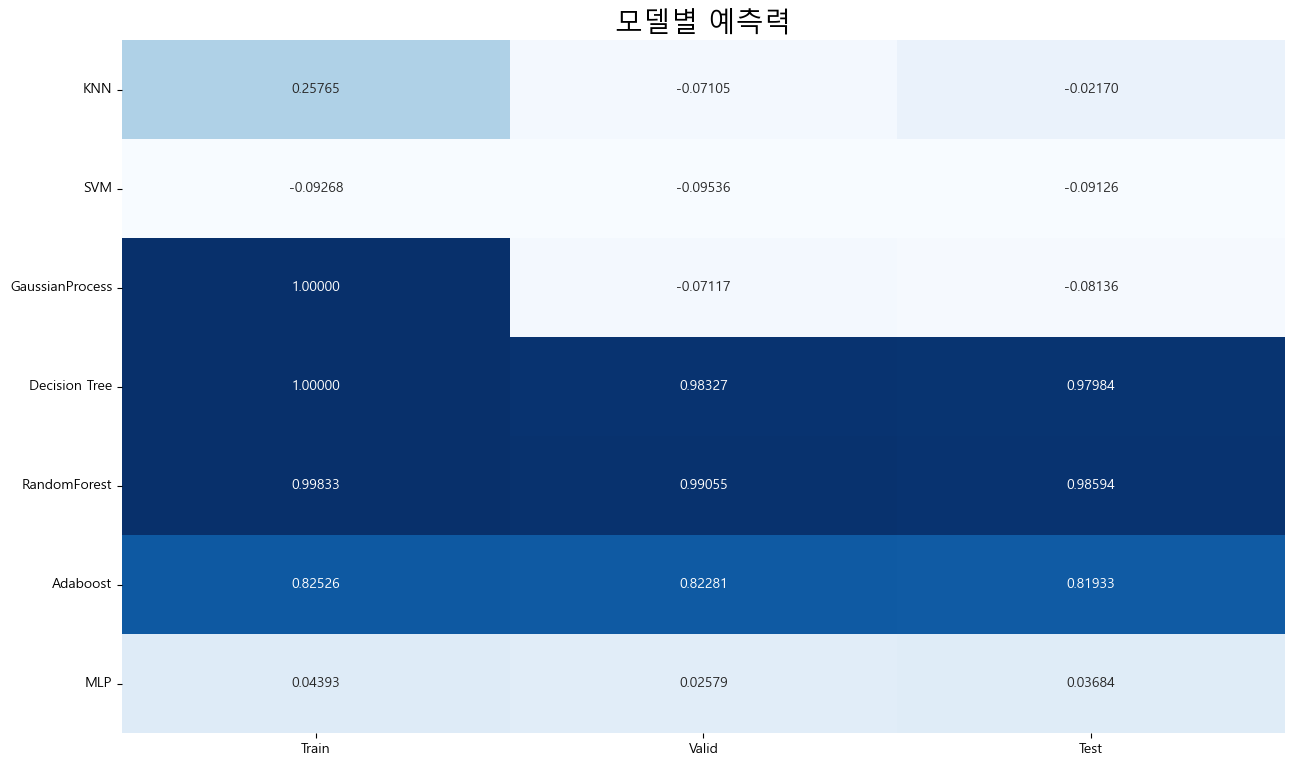

In [ ]:
import seaborn as sns

fig=plt.figure(figsize=(15,9))
ax1=fig.add_subplot(1,1,1)

sns.heatmap(
    df_scores,
    annot=True,
    cmap='Blues',
    fmt='.5f',
    cbar=False,
    ax=ax1
)

plt.title('모델별 예측력',size=20)
plt.yticks(rotation=0)
plt.show()

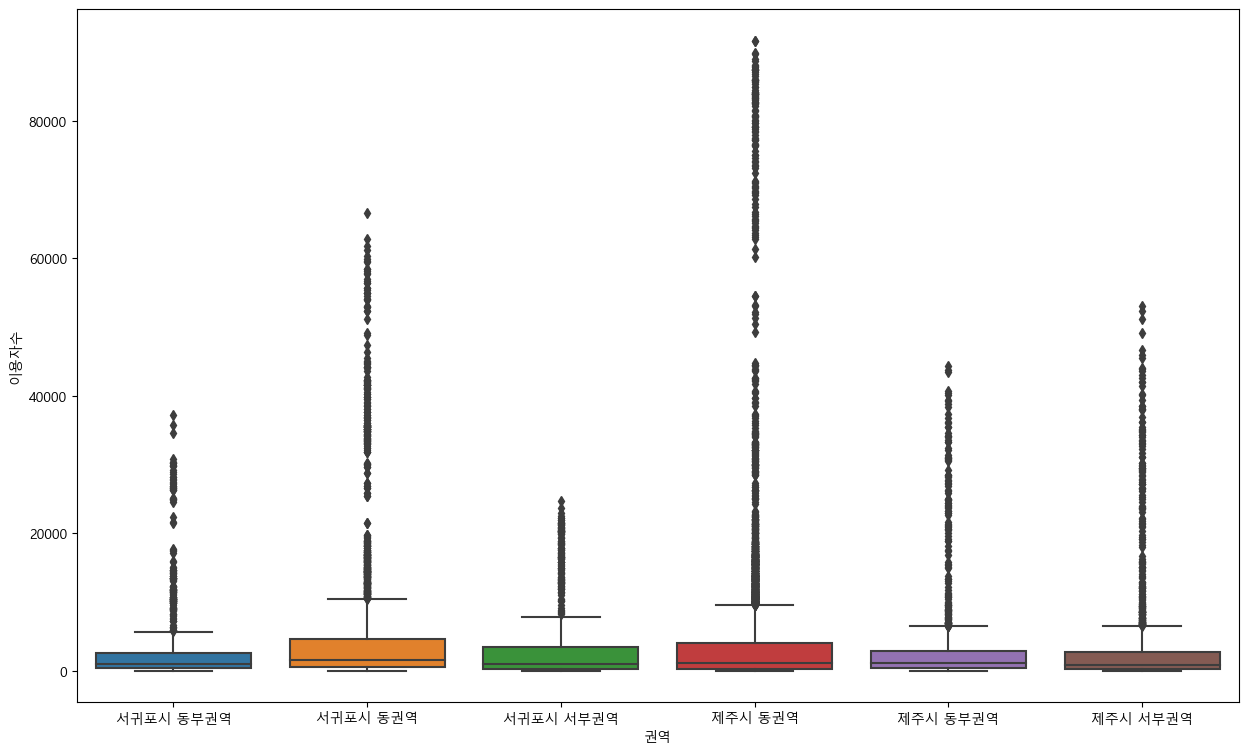

In [ ]:
fig=plt.figure(figsize=(15,9))
ax1=fig.add_subplot(1,1,1)

sns.boxplot(
    x='권역',
    y='이용자수',
    data=df2,
    ax=ax1
)
plt.show()